## 오버피팅 언더피팅

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.0


## IMDB 데이터셋

In [2]:
NUM_WORDS=1000 #자주 쓰인 상위 1000개의 단어
(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

In [3]:
train_data.shape

(25000,)

## 원래 의미

In [4]:
NUM_WORDS=1000 # only use top 1000 words
INDEX_FROM=3   # word index offset

word_to_id = keras.datasets.imdb.get_word_index()
word_to_id = {k:(v+INDEX_FROM) for k,v in word_to_id.items()}
word_to_id["<PAD>"] = 0
word_to_id["<START>"] = 1
word_to_id["<UNK>"] = 2
word_to_id["<UNUSED>"] = 3

id_to_word = {value:key for key,value in word_to_id.items()}
print(' '.join(id_to_word[id] for id in train_data[0] ))

<START> this film was just brilliant casting <UNK> <UNK> story direction <UNK> really <UNK> the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same <UNK> <UNK> as myself so i loved the fact there was a real <UNK> with this film the <UNK> <UNK> throughout the film were great it was just brilliant so much that i <UNK> the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the <UNK> <UNK> was amazing really <UNK> at the end it was so sad and you know what they say if you <UNK> at a film it must have been good and this definitely was also <UNK> to the two little <UNK> that played the <UNK> of <UNK> and paul they were just brilliant children are often left out of the <UNK> <UNK> i think because the stars that play them all <UNK> up are such a big <UNK> for the whole film but these children are amazing and should be <UNK> for what they have done don't yo

In [5]:
train_labels==0

array([False,  True,  True, ...,  True, False,  True])

## 원핫 인코딩

In [6]:
def multi_hot_sequence(sequences, dimension):
    result=np.zeros((len(sequences),dimension))
    for i, word_indices in enumerate(sequences):
        result[i,word_indices]=1.0
    return result

train_data=multi_hot_sequence(train_data, NUM_WORDS)
test_data=multi_hot_sequence(test_data, NUM_WORDS)


In [24]:
train_data[0]

array([0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1.,
       0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
       0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0.

## 기준 모델 만들기

In [6]:
baseline_model = keras.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'),    
])

baseline_model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                      metrics=['accuracy','binary_crossentropy'])
baseline_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                16016     
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 16,305
Trainable params: 16,305
Non-trainable params: 0
_________________________________________________________________


## 모델학습

In [7]:
baseline_history = baseline_model.fit(train_data,
                                      train_labels,
                                      epochs=20,
                                      batch_size=100,
                                      validation_data=(test_data, test_labels),
                                      verbose=1)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type list).

## 플로팅 함수 정의

In [9]:
def plot_history(histories, key='binary_crossentropy'):
    plt.figure(figsize=(16,10))
    for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_',' ').title())
    plt.legend()

    plt.xlim([0,max(history.epoch)])

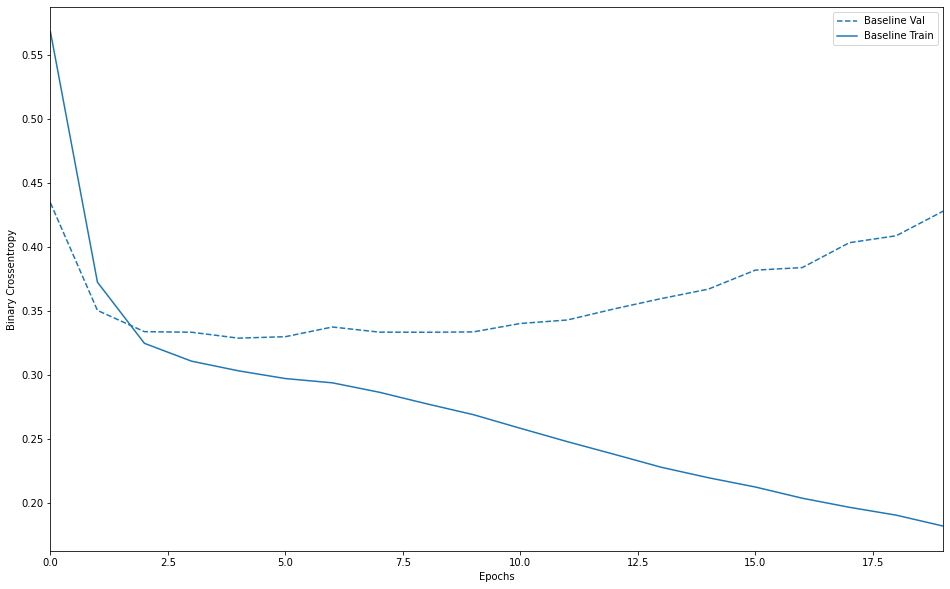

In [10]:
plot_history([('baseline',baseline_history)])

## 단순모형

In [11]:
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(1, activation='sigmoid'),    
])

smaller_model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                      metrics=['accuracy','binary_crossentropy'])
smaller_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 4004      
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 4,029
Trainable params: 4,029
Non-trainable params: 0
_________________________________________________________________


In [12]:
smaller_history = smaller_model.fit(train_data,
                                    train_labels,
                                    epochs=20,
                                    batch_size=512,
                                    validation_data=(test_data, test_labels),
                                    verbose=1)

Epoch 1/20
49/49 [==============================] - 1s 14ms/step - loss: 0.6658 - accuracy: 0.5990 - binary_crossentropy: 0.6658 - val_loss: 0.6203 - val_accuracy: 0.6988 - val_binary_crossentropy: 0.6203
Epoch 2/20
49/49 [==============================] - 1s 11ms/step - loss: 0.5799 - accuracy: 0.7452 - binary_crossentropy: 0.5799 - val_loss: 0.5529 - val_accuracy: 0.7926 - val_binary_crossentropy: 0.5529
Epoch 3/20
49/49 [==============================] - 1s 11ms/step - loss: 0.5263 - accuracy: 0.8131 - binary_crossentropy: 0.5263 - val_loss: 0.5159 - val_accuracy: 0.8244 - val_binary_crossentropy: 0.5159
Epoch 4/20
49/49 [==============================] - 1s 10ms/step - loss: 0.4942 - accuracy: 0.8426 - binary_crossentropy: 0.4942 - val_loss: 0.4928 - val_accuracy: 0.8421 - val_binary_crossentropy: 0.4928
Epoch 5/20
49/49 [==============================] - 1s 11ms/step - loss: 0.4723 - accuracy: 0.8571 - binary_crossentropy: 0.4723 - val_loss: 0.4770 - val_accuracy: 0.8482 - val_bin

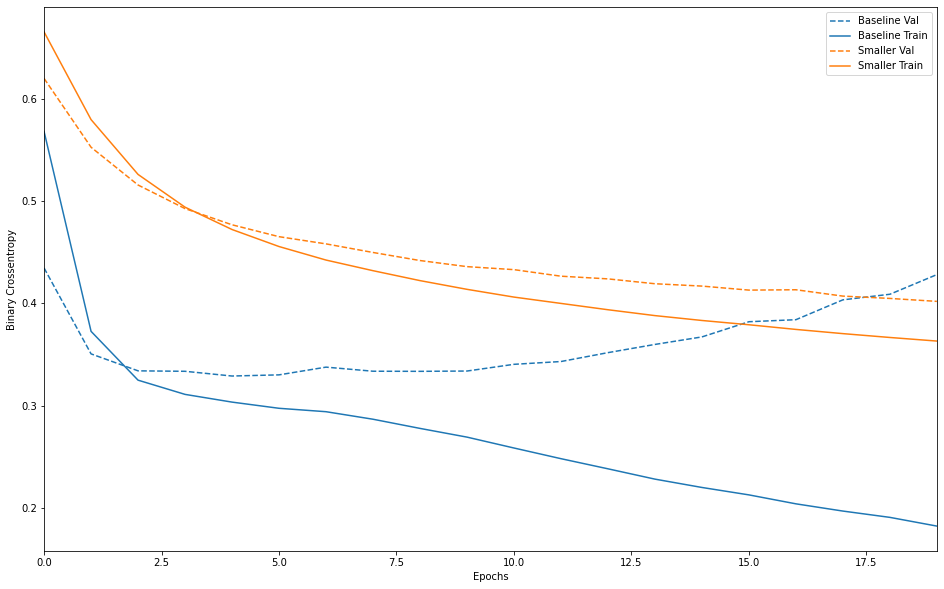

In [13]:
plot_history([('baseline',baseline_history),
              ('smaller',smaller_history)])

In [14]:
bigger_model = keras.models.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

bigger_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy','binary_crossentropy'])

bigger_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               512512    
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 513       
Total params: 775,681
Trainable params: 775,681
Non-trainable params: 0
_________________________________________________________________


In [15]:
bigger_history = bigger_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=1)

Epoch 1/20
49/49 [==============================] - 1s 14ms/step - loss: 0.4250 - accuracy: 0.7973 - binary_crossentropy: 0.4250 - val_loss: 0.3392 - val_accuracy: 0.8522 - val_binary_crossentropy: 0.3392
Epoch 2/20
49/49 [==============================] - 1s 10ms/step - loss: 0.2888 - accuracy: 0.8810 - binary_crossentropy: 0.2888 - val_loss: 0.3218 - val_accuracy: 0.8588 - val_binary_crossentropy: 0.3218
Epoch 3/20
49/49 [==============================] - 1s 11ms/step - loss: 0.2243 - accuracy: 0.9102 - binary_crossentropy: 0.2243 - val_loss: 0.3350 - val_accuracy: 0.8546 - val_binary_crossentropy: 0.3350
Epoch 4/20
49/49 [==============================] - 1s 11ms/step - loss: 0.1105 - accuracy: 0.9653 - binary_crossentropy: 0.1105 - val_loss: 0.4232 - val_accuracy: 0.8452 - val_binary_crossentropy: 0.4232
Epoch 5/20
49/49 [==============================] - 1s 11ms/step - loss: 0.0258 - accuracy: 0.9960 - binary_crossentropy: 0.0258 - val_loss: 0.5533 - val_accuracy: 0.8467 - val_bin

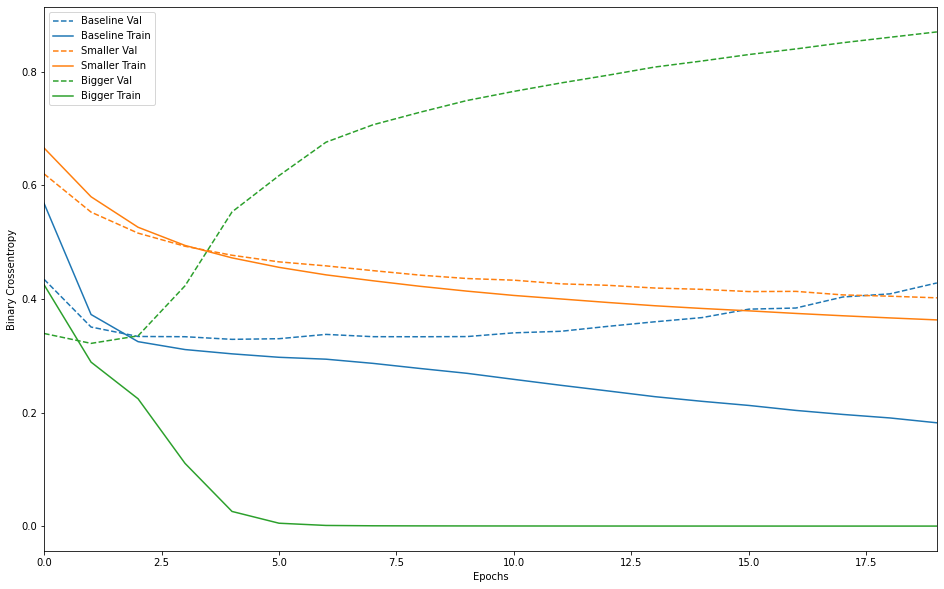

In [16]:
plot_history([('baseline', baseline_history),
              ('smaller', smaller_history),
              ('bigger', bigger_history)])

In [17]:
l2_model = keras.models.Sequential([
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

l2_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy', 'binary_crossentropy'])

l2_model_history = l2_model.fit(train_data, train_labels,
                                epochs=20,
                                batch_size=512,
                                validation_data=(test_data, test_labels),
                                verbose=1)

Epoch 1/20
49/49 [==============================] - 1s 17ms/step - loss: 0.6139 - accuracy: 0.7145 - binary_crossentropy: 0.5687 - val_loss: 0.4624 - val_accuracy: 0.8264 - val_binary_crossentropy: 0.4181
Epoch 2/20
49/49 [==============================] - 1s 12ms/step - loss: 0.4029 - accuracy: 0.8525 - binary_crossentropy: 0.3587 - val_loss: 0.3857 - val_accuracy: 0.8572 - val_binary_crossentropy: 0.3423
Epoch 3/20
49/49 [==============================] - 1s 13ms/step - loss: 0.3617 - accuracy: 0.8689 - binary_crossentropy: 0.3193 - val_loss: 0.3712 - val_accuracy: 0.8612 - val_binary_crossentropy: 0.3300
Epoch 4/20
49/49 [==============================] - 1s 14ms/step - loss: 0.3508 - accuracy: 0.8717 - binary_crossentropy: 0.3106 - val_loss: 0.3678 - val_accuracy: 0.8617 - val_binary_crossentropy: 0.3286
Epoch 5/20
49/49 [==============================] - 1s 13ms/step - loss: 0.3441 - accuracy: 0.8732 - binary_crossentropy: 0.3057 - val_loss: 0.3645 - val_accuracy: 0.8619 - val_bin

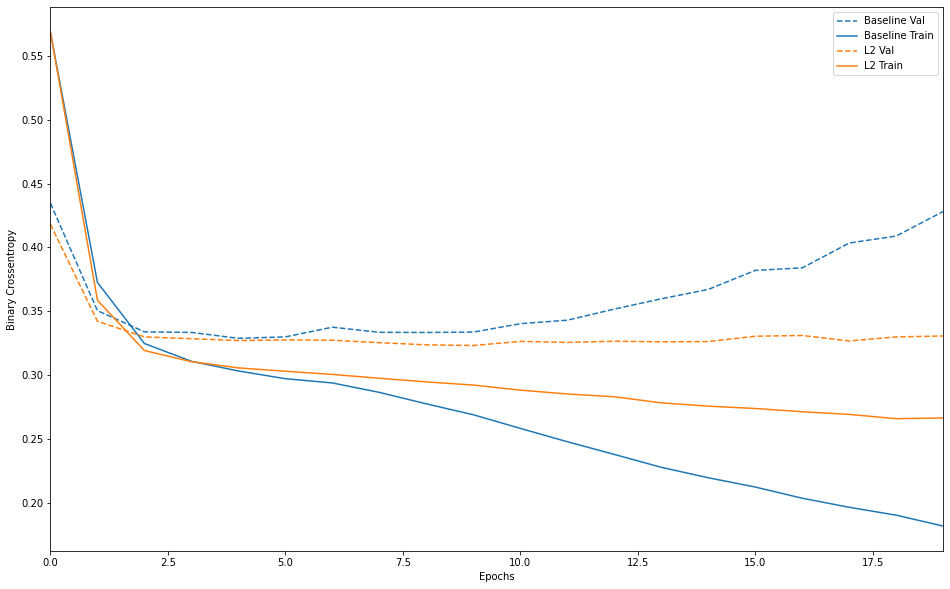

In [18]:
plot_history([('baseline', baseline_history),
              ('l2', l2_model_history)])

In [19]:
dpt_model = keras.models.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

dpt_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy','binary_crossentropy'])

dpt_model_history = dpt_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=1)

Epoch 1/20
49/49 [==============================] - 1s 16ms/step - loss: 0.6846 - accuracy: 0.5485 - binary_crossentropy: 0.6846 - val_loss: 0.6411 - val_accuracy: 0.7240 - val_binary_crossentropy: 0.6411
Epoch 2/20
49/49 [==============================] - 1s 12ms/step - loss: 0.5992 - accuracy: 0.6678 - binary_crossentropy: 0.5992 - val_loss: 0.4721 - val_accuracy: 0.8195 - val_binary_crossentropy: 0.4721
Epoch 3/20
49/49 [==============================] - 1s 12ms/step - loss: 0.4950 - accuracy: 0.7662 - binary_crossentropy: 0.4950 - val_loss: 0.3852 - val_accuracy: 0.8453 - val_binary_crossentropy: 0.3852
Epoch 4/20
49/49 [==============================] - 1s 12ms/step - loss: 0.4326 - accuracy: 0.8104 - binary_crossentropy: 0.4326 - val_loss: 0.3524 - val_accuracy: 0.8504 - val_binary_crossentropy: 0.3524
Epoch 5/20
49/49 [==============================] - 1s 11ms/step - loss: 0.3971 - accuracy: 0.8306 - binary_crossentropy: 0.3971 - val_loss: 0.3346 - val_accuracy: 0.8570 - val_bin

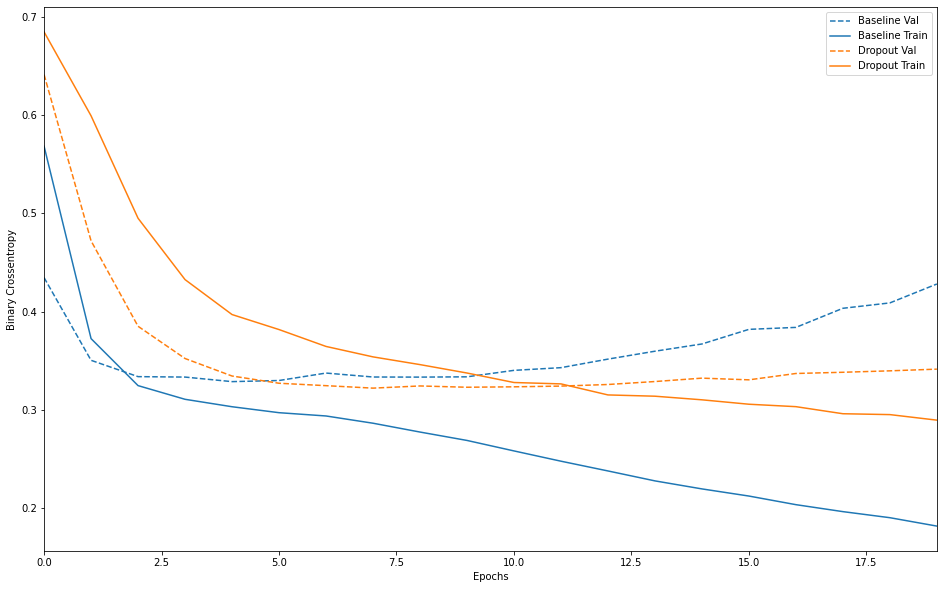

In [20]:
plot_history([('baseline', baseline_history),
              ('dropout', dpt_model_history)])